<a href="https://colab.research.google.com/github/DiBevilacqua/DiBevilacqua/blob/main/Analise_explo_Loggi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados de Logística**

## 1 Contexto

O Loggi Benchmark for Urban Deliveries (BUD) é um repositório do GitHub (link) com dados e códigos para problemas típicos que empresas de logística enfrentam: otimização das rotas de entrega, alocação de entregas nos veículos da frota com capacidade limitada, etc. Os dados são sintetizados de fontes públicas (IBGE, IPEA, etc.) e são representativos dos desafios que a startup enfrenta no dia a dia, especialmente com relação a sua escala. Neste estudo, será analisado dados referente a serviços prestados no Distrito Federal.



## 2\. Pacotes e bibliotecas

#Atenção: Vamos instalar GeoPandas para visualização das coordenadas dos hubs e das entregas no mapa do Distrito Federal. O pacote adiciona funcionalidades geoespaciais ao pacote Python Pandas.



In [1]:
!pip install geopandas

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import geopandas as gpd
import geopy

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


## 3\. Exploração de dados

## 3.1. Coleta


In [3]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

#Vamos carregar os dados do arquivo em um dicionario Python chamado data:

In [5]:
with open('deliveries.json', mode='r', encoding='utf8') as arquivo:
  data = json.load(arquivo)

In [6]:
len(data)

199

##3.2. Wrangling

In [18]:
loggi_df = pd.DataFrame(data)
loggi_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


# Repare que a coluna origin contem dados nested ou aninhados na estrutura do JSON. Vamos normalizar a coluna com uma operação conhecida como flatten ou achatamento que transforma cada chave do JSON em uma nova coluna:



In [19]:
origin_df = loggi_df['origin'].apply(pd.Series)
origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


#Com o dados achatados, vamos junta-los ao conjunto de dados principal:



In [20]:
loggi_df = pd.merge(left=loggi_df, right=origin_df, how='inner', left_index=True, right_index=True)
loggi_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [21]:
loggi_df = loggi_df.drop('origin', axis=1)
loggi_df = loggi_df[['name', 'region', 'lng', 'lat', 'vehicle_capacity', 'deliveries']]
loggi_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [22]:
loggi_df.rename(columns={'lng':'hub_lng', 'lat':'hub_lat'}, inplace=True)
loggi_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


#Repare que a coluna deliveries contem dados uma lista de dados nested ou aninhados na estrutura do JSON. Vamos normalizar a coluna com uma operação conhecida como explode ou explosão que transforma cada elemento da lista em uma linha. Por fim, faremos os flatten ou achatamento do resultado coluna:

In [23]:
deliveries_exploded_df = loggi_df[['deliveries']].explode('deliveries')
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [24]:
deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['size'])).rename(columns={'deliveries':'delivery_size'}),
  pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['point']['lng'])).rename(columns={'deliveries':'delivery_lng'}),
  pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['point']['lat'])).rename(columns={'deliveries':'delivery_lat'}),
  ], axis=1)

deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [25]:
len(deliveries_normalized_df)

636149

#Com o dados explodidos, vamos normaliza-los para combina-los ao conjunto de dados principal:

In [26]:
loggi_df = loggi_df.drop('deliveries', axis=1)
loggi_df = pd.merge(left=loggi_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
loggi_df.reset_index(inplace=True, drop=True)

loggi_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


##3.3. Estrutura



In [27]:
loggi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


In [28]:
print('Porcentagem de Dados faltantes:\n')
loggi_df.isnull().sum() / len(loggi_df) * 100

Porcentagem de Dados faltantes:



name                0.0
region              0.0
hub_lng             0.0
hub_lat             0.0
vehicle_capacity    0.0
delivery_size       0.0
delivery_lng        0.0
delivery_lat        0.0
dtype: float64

In [29]:
linhas, colunas = loggi_df.shape
print(f'O dataset possui {linhas} linhas e {colunas} colunas')

O dataset possui 636149 linhas e 8 colunas


##3.4 Schema

In [30]:
loggi_df.dtypes

name                 object
region               object
hub_lng             float64
hub_lat             float64
vehicle_capacity      int64
delivery_size         int64
delivery_lng        float64
delivery_lat        float64
dtype: object



> Atributos categóricos









In [32]:
loggi_df.select_dtypes('object').describe().transpose()


,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708




> Atributos numéricos




In [33]:
loggi_df.drop(['name','region'], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


## 4. Manipulação

# 4.1 enriquecimento



> Geocodificação reversa do Hub



In [34]:
hub_df = loggi_df[['region', 'hub_lng', 'hub_lat']]
hub_df = hub_df.drop_duplicates().sort_values(by='region').reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


##Vamos então aplicar a geocodificação nas coordenadas das três regiões e extrair informações de cidade e bairro.



In [35]:
geolocator = Nominatim(user_agent='ebac_geocoder')
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds = 1)

In [36]:
hub_df['coordinates'] = hub_df['hub_lat'].astype(str) + ',' + hub_df['hub_lng'].astype(str)
hub_df['geodata'] = hub_df['coordinates'].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248,-47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334,-47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274,-48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [37]:
hub_geodata_df = pd.json_normalize(hub_df['geodata'].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,13551965,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.053343,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-127,Brasil,br,NaN,NaN,NaN,NaN
1,13548034,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.100010,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,10766946,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.000010,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [38]:
hub_geodata_df = hub_geodata_df[['address.town', 'address.suburb', 'address.city']]
hub_geodata_df.rename(columns={'address.town':'hub_town', 'address.suburb':'hub_suburb', 'address.city':'hub_city'}, inplace=True)
hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
hub_geodata_df['hub_suburb'] = np.where(hub_geodata_df['hub_suburb'].notna(), hub_geodata_df['hub_suburb'], hub_geodata_df['hub_city'])
hub_geodata_df = hub_geodata_df.drop('hub_town', axis=1)
hub_geodata_df.head()

<ipython-input-38-41629321d558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={'address.town':'hub_town', 'address.suburb':'hub_suburb', 'address.city':'hub_city'}, inplace=True)
<ipython-input-38-41629321d558>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
<ipython-input-38-41629321d558>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


#O DataFrame hub_geodata_df com as informações de cidade e bairro é então combinado ao DataFrame principal loggi_df, enriquecendo assim o dado.



In [39]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[['region', 'hub_suburb', 'hub_city']]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [40]:
loggi_df = pd.merge(left=loggi_df, right=hub_df, how='inner', on='region')
loggi_df = loggi_df[['name', 'region', 'hub_lng', 'hub_lat', 'hub_suburb',
                               'hub_city', 'vehicle_capacity', 'delivery_size', 'delivery_lng', 'delivery_lat']]
loggi_df.head()

,name,region,hub_lng,hub_lat,hub_suburb,hub_city,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055




## Geocodificação reversa da Entrega








.Enquanto o hub contem apenas 3 geolocalizações distintas, as entregas somam o total de 636.149, o que levaria em torno de 7 dias para serem consultadas no servidor do Nominatim, dada a restrição de uma consulta por segundo. Contudo, para cargas pesadas como esta, o software oferece uma instalação local (na sua própria máquina) que pode ser utilizada sem restrição.

In [41]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

In [43]:
deliveries_geodata_df = pd.read_csv('deliveries-geodata.csv')
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [44]:
loggi_df = pd.merge(left=loggi_df, right=deliveries_geodata_df[['delivery_city', 'delivery_suburb']], how='inner', left_index=True, right_index=True)
loggi_df.head()

,name,region,hub_lng,hub_lat,hub_suburb,hub_city,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


## 4.2. Qualidade

In [45]:
loggi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_suburb        636149 non-null  object 
 5   hub_city          636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 58.2+ MB


In [46]:
loggi_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
hub_suburb          False
hub_city            False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

##5. Visualização

> 5.1. Mapa de entregas por região






mapa do distrito federal

Vamos fazer o download dos dados do mapa do Distrito Federal do site oficial do
IBGE através do seguinte link para criar o DataFrame mapa. Note a coluna geometry.

In [47]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

In [50]:
mapa = gpd.read_file("distrito-federal.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."




#Mapa dos hubs





> Vamos criar o DataFrame geo_hub_df através do DataFrame loggi_df. Note a nova coluna geometry.





In [51]:
hub_df = loggi_df[['region', 'hub_lng', 'hub_lat']].drop_duplicates().reset_index(drop=True)
hub_df = gpd.GeoDataFrame(hub_df, geometry=gpd.points_from_xy(hub_df.hub_lng, hub_df.hub_lat))
hub_df.head()

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


#Mapa das entregas

In [52]:
geo_deliveries_df = gpd.GeoDataFrame(loggi_df, geometry=gpd.points_from_xy(loggi_df.delivery_lng, loggi_df.delivery_lat))
geo_deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_suburb,hub_city,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


##Visualização

<ipython-input-54-0d718dca73dd>:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


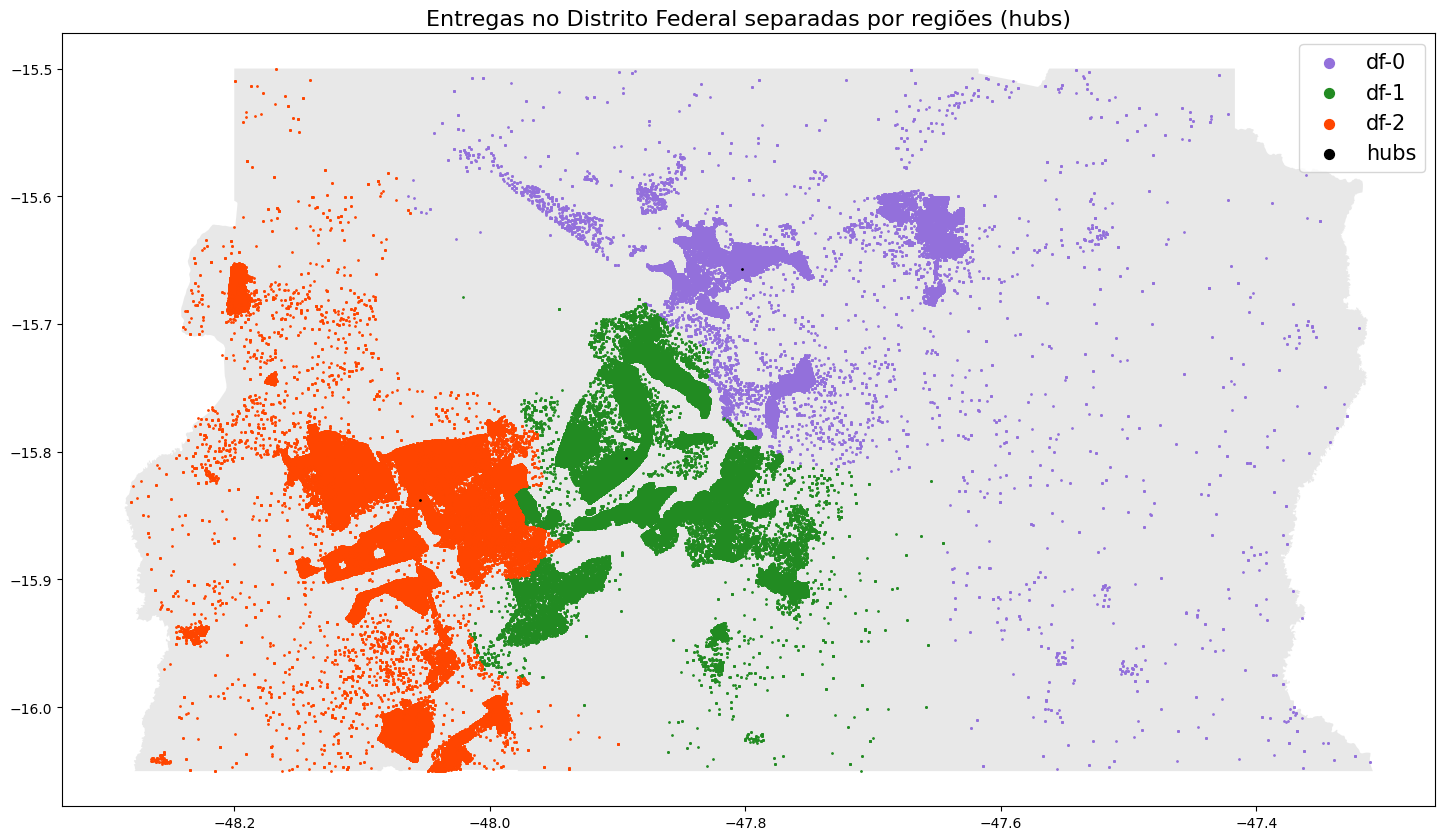

In [54]:
#criando o plot vazio

fig, ax = plt.subplots(figsize=(45/2.54, 45/2.54))

#plotando o mapa do distrito federal
mapa.plot(ax=ax, alpha=0.5, color='lightgrey')

#plot mapa das regiões
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color='mediumpurple', label='df-0')
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color='forestgreen', label='df-1')
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color='orangered', label='df-2')

#plot dos hubs
hub_df.plot(ax=ax, markersize=1, color='black', label='hubs')

#plot Legenda
plt.title('Entregas no Distrito Federal separadas por regiões (hubs)', fontdict={'fontsize':16})
lgnd = plt.legend(prop={'size': 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

##Insights:
1... De acordo com a visualização as entregas estão corretamente alocadas aos seus respectivos hubs(centros de distribuição regional).

2... A região df-2 e df-0 que corresponde as regiões de Taguatinga, Ceilândia, Samambaia, Sobradinho, Planaltina e São Sebastião possui as entregas em locais mais distantes, o que pode gerar um tempo e preço de entrega maior.

3.... A região central df-1 que corresponde a Brasília, Guará, Cruzeiro e Lago Sul possui a maior concentração de entregas.

#5.2. Gráfico de entregas por região

##Agregação

In [55]:
grafico = pd.DataFrame(loggi_df[['region', 'vehicle_capacity']]. value_counts(normalize=True)).reset_index()
grafico.rename(columns={0:'region_percent'}, inplace=True)
grafico.head()

,region,vehicle_capacity,proportion
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


##Visualização

In [60]:
print(grafico.columns)
print(pd.DataFrame(loggi_df[['region', 'vehicle_capacity']]. value_counts(normalize=True)).reset_index().rename(columns={0:'region_percent'}))


Index(['region', 'vehicle_capacity', 'proportion'], dtype='object')
  region  vehicle_capacity  proportion
0   df-1               180    0.478988
1   df-2               180    0.410783
2   df-0               180    0.110229


<ipython-input-64-37145af2738b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=grafico, x='region', y='proportion', ci=None, palette='deep')
<ipython-input-64-37145af2738b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=grafico, x='region', y='proportion', ci=None, palette='deep')


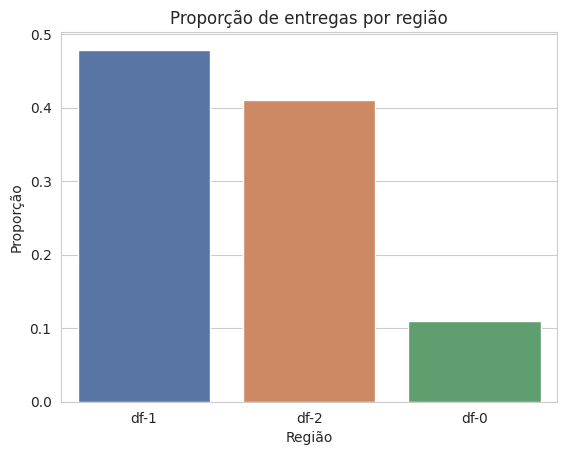

In [64]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=grafico, x='region', y='proportion', ci=None, palette='deep')
  grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Proporção');

## df-1
## df-2  correspondem a 88% das entregas

## df-0 corresponde a 11% das entregas

##Insights:




1.   As regiões df-1 e df-2 possuem ,respectivamente, as maiores proporções na quantidade de entregas realizadas. Enquanto, a região df-0 possui a menor.
2.   A capacidade dos veículos é mesma para todos os hubs, logo os veículos poderiam ser deslocados para as regiões de maior tráfego.

